Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.Some of the unsupervised learning tasks are clusteing,anomaly detection and dimensionality reduction.

In this project, we are going to look at 
*   PCA
*   Kernel PCA
*   K-meanS clustering
*   DBSCAN clustering
*   Agglomerative Clustering
*   GMM clustering
*   Anomaly detection using GMM 
*   Anomaly detection using Isolation Forest


Importing required packages

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=Warning)


from matplotlib import patches, image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn import mixture
from sklearn.ensemble import IsolationForest


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [64]:
#download the diabetes dataset
!gdown --id 1sCWv6A5k14CYsqGJdSJsXES6cdc0_8qL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sCWv6A5k14CYsqGJdSJsXES6cdc0_8qL
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 32.2MB/s]


In [65]:
diabetes = pd.read_csv("/content/diabetes.csv")

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [66]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
#Extracting target from the data
y=diabetes["Outcome"]

In [68]:
diabetes.shape

(768, 9)

In [69]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
#removing target from the data
diabetes=diabetes.drop(["Outcome"],axis=1)

In [71]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [72]:
# Standardizing the data
scaling=StandardScaler()
scaling.fit(diabetes)
Scaled_data=scaling.transform(diabetes)

1)Reduce the dimension of Scaled_data to 2 by applying PCA.Use sklearn PCA function.

In [73]:
def pca(data,d): 
  '''function to perform PCA using sklearn library'''
  #d is the dimension to which we want to reduce the data.
  #random_state=0
  (m,n)=np.shape(data)
  #initialization
  X_pca=np.zeros((m,d)) #data after applying pca
  var=np.array([]) #how much variance is explained by each principal component
  eig_vec=np.array([]) #values of eigen vectors covariance matrix
  loss=0 #Reconstruction loss

  #Apply PCA on data and reduce it dimension to d
  pca = PCA(n_components = d)
  X_pca= pca.fit_transform(data)
 

  # check how much variance is explained by each principal component
  var=(pca.explained_variance_ratio_)
  

  # values of eigen vectors
  eig_vec=pca.components_ 
  

  #Reconstruction loss
  X_recovered = pca.inverse_transform(X_pca)
  loss=mean_squared_error(data,X_recovered)
 

  #return data reduced to d dimension,explained_variance_ratio,eigen vectors and reconstruction loss
  return(X_pca,var,eig_vec,loss)

In [74]:
X_pca,var,eig_vec,loss=pca(Scaled_data,2)

Text(0, 0.5, 'reconstruction_loss')

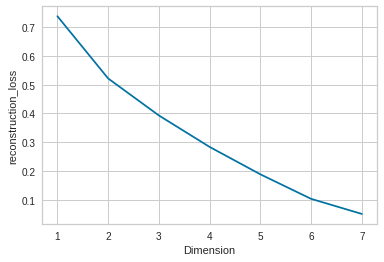

In [75]:
#plot the reconstruction error.
reconstruction_loss=[]
dimension=[]
for i in range(1,8):
  red_data,var,eig_vec,loss=pca(Scaled_data,i)
  dimension.append(i)
  reconstruction_loss.append(loss)

plt.plot(dimension,reconstruction_loss)
plt.xlabel("Dimension")
plt.ylabel("reconstruction_loss")

2)Reduce the dimension of Scaled_data to 2 using PCA from scratch.

In [76]:
def pca_scratch(data ,d):
    '''function does the PCA implementation from scratch.'''
    #Step 1: Standardizing the data
    #Data is already standardized.
    (m,n)=np.shape(data)
    #initialization
    X_reduced=np.zeros((m,d)) #data after applying pca
    loss=0 #reconstruction loss


    #step-2 : Calculate the covariance matrix of the data
    features=data.T
    cov_mat = np.cov(features)
  

    #Step-3 : Find the eigenvalues and eigenvector of covariance matrix (use np.linalg.eigh)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    

    #Step-4 : Sort the eigenvectors in the descending order of eigenvalues.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    

    #Step-5 : From the sorted eigenvectors,choose the num_components eigenvectors .
    eigenvector_subset = sorted_eigenvectors[:,0:d]
    
     
    #Step-6 : Calculate data reduced to d dimensions
    X_reduced = np.dot(eigenvector_subset.transpose() , data.transpose() ).transpose()
    

    # Calculate the reconstruction loss
    X_recovered=np.dot(X_reduced,eigenvector_subset.T )
    loss=mean_squared_error(data,X_recovered)
  
    #return data reduced to d dimension and reconstruction loss
    return (X_reduced,loss)

In [77]:
#Reduce the dimension of the data and calculate reconstruction loss using pca from scratch
data_reduced,loss =pca_scratch(Scaled_data , 2) 

In [78]:
loss

0.5218012392614343

In [79]:
data_reduced.shape

(768, 2)

3)Apply kernel pca on Scaled_data and reduce it dimension to 2 and calculate the reconstruction error.Use sigmoid kernel and gamma=0.03.

In [80]:
def kpca(data,d):
  '''function to perform kernel pca using sklearn library'''
  #d is the dimension to which we want to reduce the data.
  (m,n)=np.shape(data)
  random_state=0
  #initialization
  X_kpca=np.zeros((m,d))  #data after applying pca
  loss=0  #Reconstruction loss
  
  #Apply kernelPCA on data and reduce it dimension to d
  KPCA= KernelPCA(n_components=d, kernel='sigmoid',gamma=0.03,fit_inverse_transform=True)
  KPCA.fit(Scaled_data)
  X_kpca =KPCA.transform(data)
  

  #Reconstruction loss
  X_recovered=KPCA.inverse_transform(X_kpca)
  loss=mean_squared_error(Scaled_data,X_recovered)
  
  #return data reduced to d dimension and reconstruction loss
  return(X_kpca,loss)

In [81]:
X_kpca,loss_kpca=kpca(Scaled_data,2)

In [82]:
np.linalg.norm(X_kpca)

6.0286531116030355

4)Find the optimum parameters for kernel PCA using gridsearchcv,when we want to classify the data using logistic regression

In [83]:
def gridserach(Scaled_data,y):
  '''function to perform gridserachcv to find best parameters for kpca when logistic regression is used for classification'''
  #initialization
  best_par=[] #best parameters after gridsearchcv

  #classification pipeline
  clf = Pipeline([("kpca", KernelPCA(n_components=2)),("log_reg", LogisticRegression())])
  #parameter grid we are using
  param_grid = [{"kpca__gamma": [0.01,0.03, 0.05, 10],"kpca__kernel": ["rbf", "sigmoid","linear","poly"]}]

  #perform gridsearchcv
  grid_search = GridSearchCV(clf, param_grid)
  grid_search.fit(Scaled_data,y)
  best_par=grid_search.best_params_
 
  #return best parameters after gridsearchcv
  return(best_par)

In [84]:
#best parameters found
best_par=gridserach(Scaled_data,y)

In [85]:
best_par

{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}

5)Perform kmeans clustering on the X_pca and calculate inertia and silhouette score

In [86]:
def kmean(X_pca,n):
  '''function to perform k-means clustering and calculate inertia and silhoutte score'''
  random_state=1

  (m,d)=np.shape(X_pca)
  #initialization
  y_predict=np.zeros(m)  #predicted labels
  inertia=0 ##inertia
  sil_score=0 #silhouette score

  #perform kmeans clustering
  kmeans = KMeans(n_clusters=n,random_state=1)
  y_predict = kmeans.fit_predict(X_pca)
 

  #inertia
  inertia=kmeans.inertia_
 

  #silhouette score
  sil_score=(silhouette_score(X_pca, kmeans.labels_))
 

  #return predicted labels,inertia and silhouette score
  return(y_predict,inertia,sil_score)

In [87]:
y_predict,inertia,sil_score=kmean(X_pca,2)

In [88]:
sil_score

0.36624764713362085

In [89]:
#checking how inerrtia and silhouette score changes when no of clusters varies
for i in range(2,6):
  y_predict,inertia,sil_score=kmean(X_pca,i)
  print("no of clusters= ",i," inertia = ",inertia,"silhoutte score = ",sil_score)

no of clusters=  2  inertia =  1926.7828478540962 silhoutte score =  0.36624764713362085
no of clusters=  3  inertia =  1178.2091691360401 silhoutte score =  0.3911448124642483
no of clusters=  4  inertia =  913.2269873880132 silhoutte score =  0.36394569136963767
no of clusters=  5  inertia =  736.3042018379907 silhoutte score =  0.3593145083290148


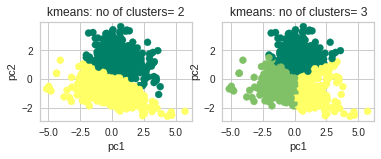

In [90]:
#visualize the clustering
plt.subplot(2,2,1)
y_predict,inertia,sil_score=kmean(X_pca,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_predict, cmap = 'summer')
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("kmeans: no of clusters= 2")

plt.subplot(2,2,2)
y_predict,inertia,sil_score=kmean(X_pca,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_predict, cmap = 'summer')
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("kmeans: no of clusters= 3")
plt.show()

6)Perform DBSCAN on X_pca and detect anomalies.

In [91]:
def dbscan(data,e,n):
  '''function to perform DBSCAN on data and calculate silhouette score'''
  
  # e stands for eps and n for min_samples

  (m,d)=np.shape(data)
  #initialization
  unique_cluste=np.array([]) #unique clusters
  label=np.zeros(m)   #label for each datapoints
  sil_score=0 #silhouette score

  #perform DBCAN clustering
  dbscan = DBSCAN(eps=e, min_samples=n)
  dbscan.fit(data)
 
  #find unique clusters
  unique_cluster=np.unique(dbscan.labels_)
  

  #find label for each datapoints
  label=dbscan.labels_
 

  #silhouette score
  sil_score=(silhouette_score(data, dbscan.labels_))
  

  #return unique clusters,predicted labels and silhouette score
  return(unique_cluster,label,sil_score)

In [92]:
unique_cluster,label,sil_score=dbscan(X_pca,0.2,3)

In [93]:
#print silhoutte score,unique clusters for different eps and min_samples
for i in range(2,8,2):
  for j in range(3,6,2):
    unique_cluster,label,sil_score=dbscan(X_pca,i/10,j)
    print("eps= ",(i/10),"min_samples= ",j,"unique_clusters_in_data: ",unique_cluster,"silhoutte score= ",sil_score)

eps=  0.2 min_samples=  3 unique_clusters_in_data:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] silhoutte score=  -0.19924474586366278
eps=  0.2 min_samples=  5 unique_clusters_in_data:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] silhoutte score=  -0.21974269634401974
eps=  0.4 min_samples=  3 unique_clusters_in_data:  [-1  0  1  2  3  4  5] silhoutte score=  0.12134458999892389
eps=  0.4 min_samples=  5 unique_clusters_in_data:  [-1  0] silhoutte score=  0.4206060635597942
eps=  0.6 min_samples=  3 unique_clusters_in_data:  [-1  0  1] silhoutte score=  0.45758986485277414
eps=  0.6 min_samples=  5 unique_clusters_in_data:  [-1  0] silhoutte score=  0.49036642759884613


Text(0, 0.5, 'pc2')

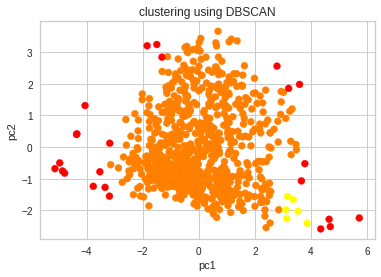

In [94]:
#visualization of DBSCAN clustering
unique_cluster,label,sil_score=dbscan(X_pca,0.5,5)
# Visualize data with DBSCAN labels
plt.scatter(X_pca[:,0], X_pca[:,1], c = label, cmap= "autumn")
plt.title("clustering using DBSCAN")
plt.xlabel("pc1")
plt.ylabel("pc2")
#dbscan perform very badly for the above clutering.
# we can use it for anomaly detection.Here red dots indicate the anomalies.

7)Cluster the 10 training instances of X_pca using kmeans and find the labels of all other instances using label propogation.Then calculate the classification score for logistic regression on test data .

In [95]:
#splitting the Scaled_data into test and train
X_train, X_test, y_train, y_test = train_test_split(Scaled_data,y,test_size = 0.2, random_state=0)

In [96]:
X_train, X_test, y_train, y_test=np.array(X_train), np.array(X_test), np.array(y_train),np.array(y_test)

In [97]:
X_train.shape

(614, 8)

In [98]:
#Applying pca on test and train data
pca = PCA(n_components = 2)
train_pca= pca.fit_transform(X_train)
test_pca=pca.transform(X_test)

X_train=train_pca
X_test=test_pca

In [99]:
test_pca.shape

(154, 2)

In [100]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [101]:
# Logistic regression on 10 random labeled instances
n_labeled =10
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.6623376623376623

In [102]:
# Logistic regression on full training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7597402597402597

Propagating the labels to all the other instances in the same cluster is called label propagation

In [103]:
def label_propogate(X_train,y_train,X_test,y_test,k):
  '''function to perform label propogation'''
  #initialization
  score=0 #score of logistic regression for test data

  
  # Cluster the training instances using kmeans,k is the no of clusters
  kmeans = KMeans(n_clusters=k,random_state = 123)
  
  # compute distances from each cluster
  X_dist = kmeans.fit_transform(X_train)
  

  # get indices of data closest to their cluster
  representative_idx = np.argmin(X_dist, axis=0)

  # get the data corresponds to indices
  X_representative = X_train[representative_idx]
 

  # Representative data labels
  y_representative = y_train[representative_idx]
 

  # Propagate labels
  y_train_propagated = np.empty(len(X_train), dtype=np.int32)
  for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative[i]

  # Use logistic regression for classification and calculate the score for test data
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train_propagated)
  score=log_reg.score(X_test, y_test)
  #return score of logistic regression for test data
  return(score)

In [104]:
score=label_propogate(X_train,y_train,X_test,y_test,10)

In [105]:
score

0.7077922077922078

8)Cluster the X_pca using GMM

In [106]:
def gmm(X_pca,n):
  '''function to perform gmm clustering'''
  # n is the number of mixture components

  (m,d)=np.shape(X_pca)
  #initialization
  y_predict=np.zeros(m)  #predicted labels
  weights=np.array([])  #weight of each mixture component
  mean=np.array([])  #mean of each mixture component 
  covariance=np.array([]) #covariance of each mixture component
  pred_prob=np.array([])  #components' density for each sample
  log_likelihood=np.array([])   #log_likelihood 
  BIC=0  #BIC 
  AIC=0  #AIC

  
  gm = GaussianMixture(n_components=n,random_state=1)
  gm.fit(X_pca)
  
  #Predict the labels for the data,X_pca
 
  y_predict=gm.predict(X_pca)

  #The weights of each mixture components.
  weights=gm.weights_

  #The mean of each mixture component
  mean=gm.means_

  #The covariance of each mixture component
  covariance=gm.covariances_

  #Evaluate the components' density for each sample
  pred_prob=gm.predict_proba(X_pca)

  #Compute the log-likelihood of each sample
  log_likelihood=(gm.score_samples(X_pca))
 

  #BIC
  BIC=gm.bic(X_pca)
 
  #AIC
  AIC=gm.aic(X_pca)
  #we want lowest bic and aic values.

  #return predicted labels,wight of each mixture component,mean of each mixture component ,covariance of each mixture component,log_likelihood ,BIC and AIC
  return(y_predict,weights,mean,covariance,pred_prob,log_likelihood,BIC,AIC)

In [107]:
#NO OF CLUSTERS=2
y_predict,weights,mean,covariance,pred_prob,log_likelihood,BIC,AIC=gmm(X_pca,2)

Text(0, 0.5, 'pc2')

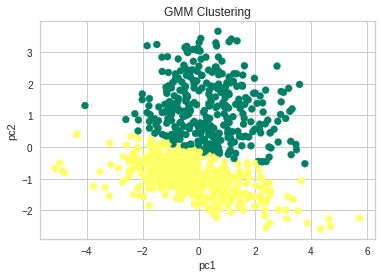

In [108]:
#VISUALIZATION OF GMM CLUSTERING
plt.scatter(X_pca[:,0], X_pca[:,1], c =y_predict, cmap= "summer")
plt.title("GMM Clustering")
plt.xlabel("pc1")
plt.ylabel("pc2")

9)Perform Agglomerative clustering on X_pca.

In [109]:
def agglomerative(k,X_pca):
  '''function to perform agglomerative clustering'''
  #k is the no of clusters

  (m,d)=np.shape(X_pca)
  #initialization
  y_predict=np.zeros(m) #predicted labels

  #fit the data in the model and predict labels
  ac = AgglomerativeClustering(n_clusters = 2)
  y_predict=ac.fit_predict(X_pca)

  #return predicted labels
  return(y_predict)

In [110]:
#agglomerative clustering
y_predict=agglomerative(2,X_pca)

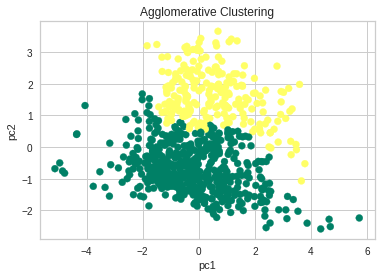

In [111]:
# Visualizing the clustering
plt.scatter(X_pca[:,0], X_pca[:,1],c = y_predict, cmap ='summer')
plt.title("Agglomerative Clustering")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

10)Using GMM,locate the anomlalies in the data.

In [112]:
def gmm_anomaly(X_pca,n):
  '''Function to detect anomalies using GMM'''
  #initialization
  anomalies=np.zeros((10,10)) #detected anomalies

  # Fit a Gaussian Mixture Model on the reduced features
  gm = mixture.GaussianMixture()
  gm.fit(X_pca)

  #calculate densities
  densities = gm.score_samples(X_pca)

  #define density threshold and find anomalies
  density_threshold = np.percentile(densities,n)
  anomalies = X_pca[densities < density_threshold]

  #return anomalies
  return(anomalies)

In [113]:
anomalies=gmm_anomaly(X_pca,4)

In [114]:
anomalies.shape

(31, 2)

Text(0, 0.5, 'pc2')

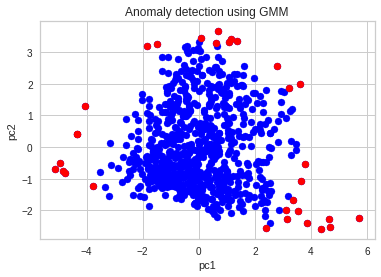

In [115]:
#plot the anomalies of gmm
plt.scatter(X_pca[:,0],X_pca[:,1],color="blue")
plt.scatter(anomalies[:,0],anomalies[:,1],color="red")
plt.title("Anomaly detection using GMM")
plt.xlabel("pc1")
plt.ylabel("pc2")

11)Detect the anomalies in the data using Isolation Forest.

In [116]:
def isolation_forest(X_pca,c):
  '''function to perform anomaly detection using isolation forest'''
  #c: contamination is the population of anomaly 

  (m,d)=np.shape(X_pca)
  #initialization
  y_pred=np.zeros(m) #predicted labels

  random_state=0
  #define the model
  model=IsolationForest(contamination=c)
  model.fit(X_pca)

  #predict the labels
  y_pred=model.predict(X_pca)

  #return the labels
  return(y_pred)

In [117]:
#use contamination=0.05
y_pred=isolation_forest(X_pca,0.05)

Text(0, 0.5, 'pc2')

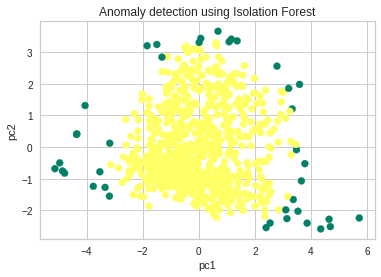

In [118]:
#visualize anomaly detection using isolation forest
plt.scatter(X_pca[:,0], X_pca[:,1], c =y_pred, cmap= "summer")
plt.title("Anomaly detection using Isolation Forest")
plt.xlabel("pc1")
plt.ylabel("pc2")

12)Perform image segmentation for the given image with the help of k-mean clustering.


Image segmentation is the task of partitioning an image into multiple segments.Here we are going to do color segmentation. We will simply assign pixels to the same segment if they have a similar color.

In [119]:
#download the image data
!gdown --id 1FWh-AylbTffvubNb4vRzNmvHk1C2wMlt


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FWh-AylbTffvubNb4vRzNmvHk1C2wMlt
To: /content/white_flower.jpg
100% 271k/271k [00:00<00:00, 109MB/s]


In [120]:
img=image.imread("/content/white_flower.jpg")

In [121]:
img.shape

(1280, 1920, 3)

(1280, 1920, 3)

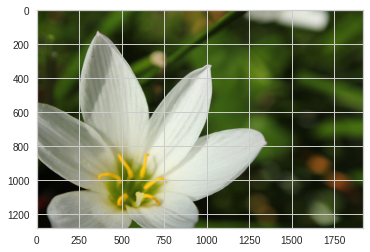

In [122]:
#Visualize the image
plt.imshow(img)
img.shape

In [123]:
def k_mean(img,c):
  '''function to perform image segmentation using kmeans'''
  #c is the no of clusters for kmeans

  #initialization
  segmented_img=np.zeros(np.shape(img)) #segmented image data

  
  #Reshaping the image into a 2D array of pixels and 3 color values (RGB)
  X_ = img.reshape(-1, 3) 
  #define kmeans clustering
  kmeans = KMeans(n_clusters = c,random_state=1)
  kmeans.fit(X_)
 
  # identify the  cluster's center for each label 
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
 
  # reshape data into the original image dimensions
  segmented_img = segmented_img.reshape(img.shape)
 
  #return segmented image data
  return(segmented_img)

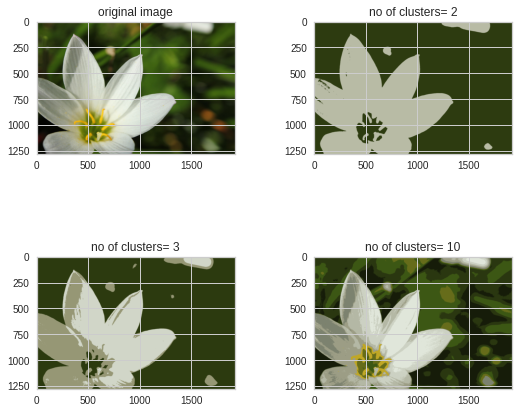

In [124]:
#visualization of image segmentation
#original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("original image")

#no of clusters=2
plt.subplot(2,2,2)
segmented_img=k_mean(img,2)
segmented_img=segmented_img/255
plt.imshow(segmented_img)
plt.title("no of clusters= 2")

#no of clusters=3
plt.subplot(2,2,3)
segmented_img=k_mean(img,3)
segmented_img=segmented_img/255
plt.imshow(segmented_img)
plt.title("no of clusters= 3")

#no of clusters=10
plt.subplot(2,2,4)
segmented_img=k_mean(img,10)
segmented_img=segmented_img/255
plt.imshow(segmented_img)
plt.title("no of clusters= 10")

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1.2, 
                    top=1.6, 
                    wspace=0.4, 
                    hspace=0.4)